# Self-Driving Car Engineer Nanodegree

## Project3: Traffic Sign Classification

The goals / steps of this project are the following:
* Load the data set
* Explore, summarize and visualize the data set
* Data preprocessing
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report

---
## Step 0: Load The Data

In [189]:
# Load pickled data
import pickle

# File paths to training, validation and testing data

training_file = './traffic_signs_data/train.p'
validation_file= './traffic_signs_data/valid.p'
testing_file = './traffic_signs_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [190]:
# Number of training examples
n_train = x_train.shape[0]

# Number of validation examples
n_validation = x_valid.shape[0]

# Number of testing examples.
n_test = x_test.shape[0]

# Shape of a traffic sign image?
image_shape = x_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

a) Traffic sign data csv: classId and signal name

b) Training data histogram

c) Testing data histogram

d) Validation data histogram

e) 6 random images visulization with class identification: 2 training, 2 test and 2 validation data

In [191]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
%matplotlib inline

#Source https://plot.ly/python/plot-data-from-csv/

traffic_sign_data = pd.read_csv('./signnames.csv')
traffic_sign_data


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


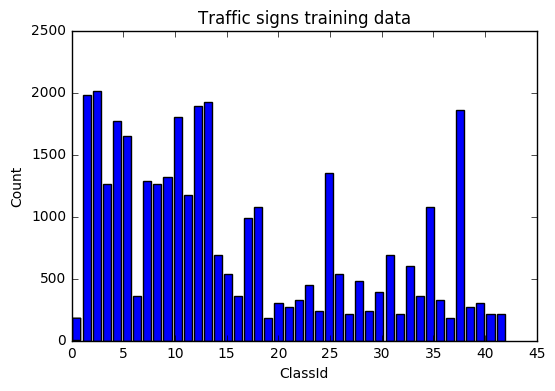

<function print>

In [192]:
plt.hist(y_train, n_classes, rwidth=0.8)
plt.ylabel('Count')
plt.xlabel('ClassId')
plt.title('Traffic signs training data')
plt.show()

print

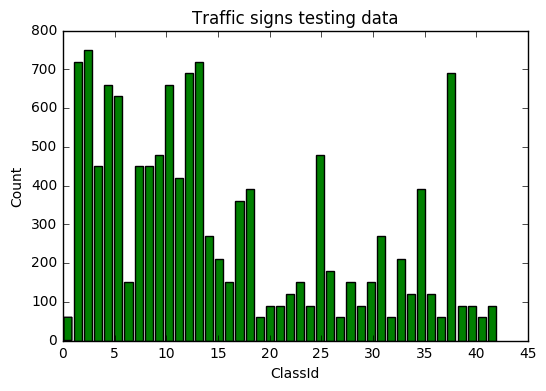

In [193]:
plt.hist(y_test, n_classes, rwidth=0.8, color = "green")
plt.ylabel('Count')
plt.xlabel('ClassId')
plt.title('Traffic signs testing data')
plt.show()

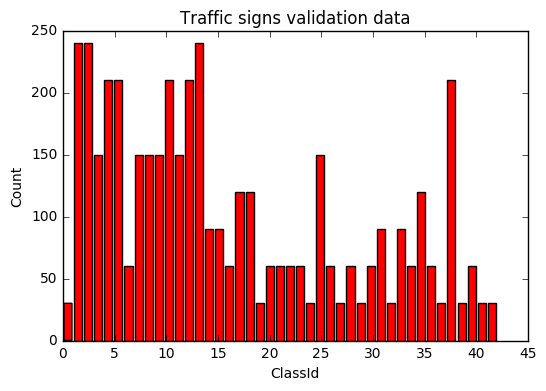

In [194]:
plt.hist(y_valid, n_classes, rwidth=0.8, color = "red")
plt.ylabel('Count')
plt.xlabel('ClassId')
plt.title('Traffic signs validation data')
plt.show()

,ClassId,SignName
33,33,Turn right ahead


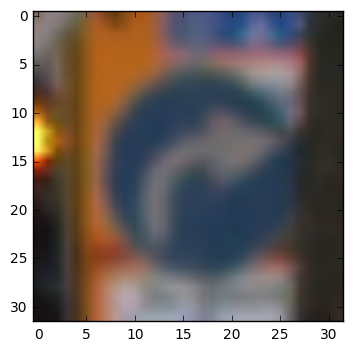

In [195]:
index1 = np.random.randint(len(x_train))
traffic_sign_image1 = x_train[index1]
plt.figure();
plt.imshow(traffic_sign_image1);
traffic_sign_data[traffic_sign_data['ClassId'] == y_train[index1]]

,ClassId,SignName
5,5,Speed limit (80km/h)


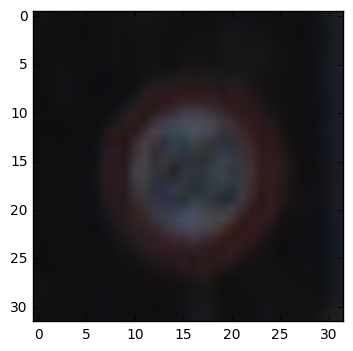

In [196]:
index2 = np.random.randint(len(x_train))
traffic_sign_image2 = x_train[index2]
plt.figure();
plt.imshow(traffic_sign_image2);
traffic_sign_data[traffic_sign_data['ClassId'] == y_train[index2]]

,ClassId,SignName
27,27,Pedestrians


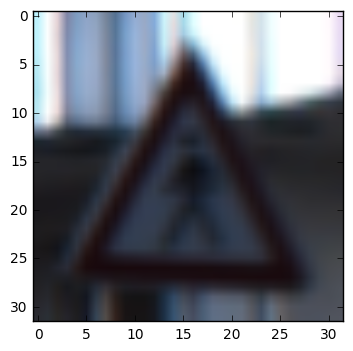

In [197]:
index3 = np.random.randint(len(x_valid))
traffic_sign_image3 = x_valid[index3]
plt.figure();
plt.imshow(traffic_sign_image3);
traffic_sign_data[traffic_sign_data['ClassId'] == y_valid[index3]]

,ClassId,SignName
5,5,Speed limit (80km/h)


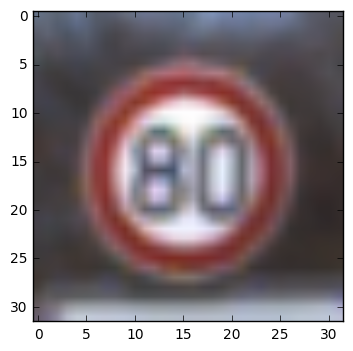

In [198]:
index4 = np.random.randint(len(x_valid))
traffic_sign_image4 = x_valid[index4]
plt.figure();
plt.imshow(traffic_sign_image4);
traffic_sign_data[traffic_sign_data['ClassId'] == y_valid[index4]]

,ClassId,SignName
26,26,Traffic signals


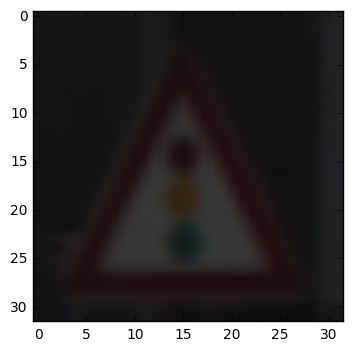

In [199]:
index5 = np.random.randint(len(x_test))
traffic_sign_image5 = x_train[index5]
plt.figure();
plt.imshow(traffic_sign_image5);
traffic_sign_data[traffic_sign_data['ClassId'] == y_train[index5]]

,ClassId,SignName
4,4,Speed limit (70km/h)


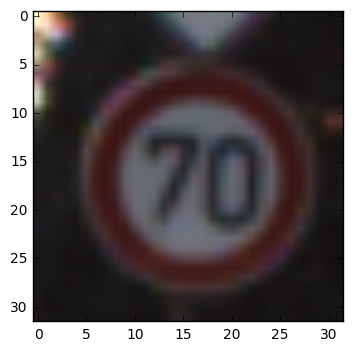

In [200]:
index6 = np.random.randint(len(x_test))
traffic_sign_image6 = x_train[index6]
plt.figure();
plt.imshow(traffic_sign_image6);
traffic_sign_data[traffic_sign_data['ClassId'] == y_train[index6]]

From the images visuazlization, it is possible to notice that there are some very bright ones (8418) and some dark ones (9911). Background presents the same problem, passing from a one with sky (16852) to a one with a dark  backgraound (9911). Also zoom is different from image to image. All the images are quite blurry.

## Step 2: Data Preprocessing

### a) Augment the dataset. This is done in 2 different ways:

a) Image filtering
b) Image rotation 

Data flipping is not used because can change traffic sign meaning, leading to uncorrect labeling.

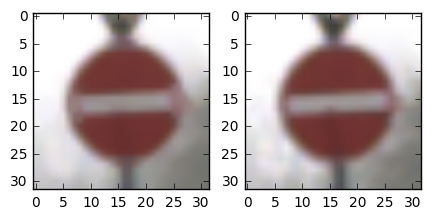

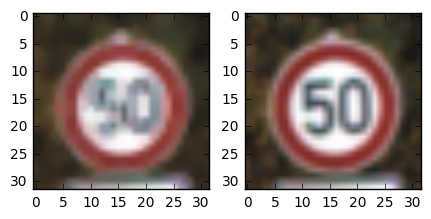

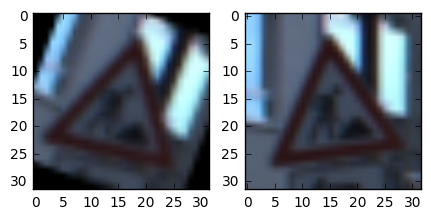

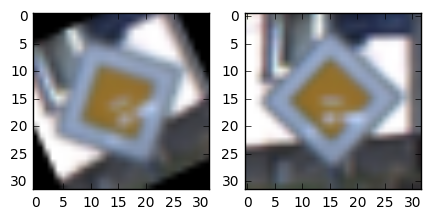

In [14]:
### Preprocess the data here. Augment data set
# https://towardsdatascience.com/image-augmentation-examples-in-python-d552c26f2873

import cv2
import random

def blur_img(img, kernel=3):
    return cv2.medianBlur(img, kernel)

def rotate_img(img):
    # source https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html
    rot_degree = np.random.choice(np.array([10,15,20,25,30]))
    rot_size = np.random.choice(np.array([0.8,0.9,1,1.1,1.2]))
    rot_dir = np.random.choice(np.array([1, -1]))
    rot = cv2.getRotationMatrix2D((16,16),rot_degree * rot_dir, rot_size)
    return cv2.warpAffine(img, rot, (32,32))

fig, ax = plt.subplots(1,2, dpi=160, figsize=(5,5))
ax = ax.ravel()
ax[0].imshow(blur_img(x_train[index1]), cmap='gray') 
ax[1].imshow((x_train[index1]), cmap='gray') 
plt.show()

fig, ax = plt.subplots(1,2, dpi=160, figsize=(5,5))
ax = ax.ravel()
ax[0].imshow(blur_img(x_train[index2]), cmap='gray') 
ax[1].imshow((x_train[index2]), cmap='gray') 
plt.show()

fig, ax = plt.subplots(1,2, dpi=160, figsize=(5,5))
ax = ax.ravel()
ax[0].imshow(rotate_img(x_valid[index3]), cmap='gray') 
ax[1].imshow((x_valid[index3]), cmap='gray') 
plt.show()

fig, ax = plt.subplots(1,2, dpi=160, figsize=(5,5))
ax = ax.ravel()
ax[0].imshow(rotate_img(x_valid[index4]), cmap='gray') 
ax[1].imshow((x_valid[index4]), cmap='gray') 
plt.show()

Imbalanced dataset can lead to completely ignoring the minority class in favor of the majority class. This is happening in current data set, so a data augmentation is needed.

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

In [15]:
# Calulate classes occurance and store max_count

counts = np.zeros(n_classes)

for i in range (0, n_classes):
    counts[i] = np.sum(y_train == i)
    
# Sample ranges    
ranges = {i:np.argwhere(y_train==i).flatten() for i in range(n_classes)}
        
max_counts = np.amax(counts)
print(max_counts) 

2010.0


Since the highest number of occurancy for a class is 2010, every class will be bringed to 2500 adding blurred or rotated images.

Important is to classify new immages correctly.

In [18]:
new_images = []
final_images_per_classes = 2500

def change_img(img):
    #source https://github.com/glaumarkus/AD_TrafficSignClassifier/blob/master/Traffic%20Sign%20Classifier.ipynb
    choice = np.random.choice([0,1])
    if choice == 0:
        img = blur_img(img)
    elif choice == 1:
        img = rotate_img(img)
            
    return img

count = 0
tot_count = sum([int(final_images_per_classes-counts[i]) for i in range(n_classes)])
changed_images = np.empty((tot_count,32,32,3), dtype=np.uint8)
changed_images_label = np.empty(tot_count, dtype=np.uint8)


for i in range (n_classes):
    random_image_from_class = np.random.choice(ranges[i],size=int(final_images_per_classes)-int(counts[i]))
    for r in random_image_from_class:
        changed_images[count] = change_img(x_train[r])
        changed_images_label[count] = i 
        count += 1

In [19]:
print(tot_count) 
print(changed_images.shape)
print(changed_images_label.shape)
print(x_train.shape)

72701
(72701, 32, 32, 3)
(72701,)
(34799, 32, 32, 3)


In [20]:
# merge with existing 
x_train = np.append(x_train, changed_images, axis=0)    
y_train = np.append(y_train, changed_images_label)   

In [21]:
print(x_train.shape)
print(y_train.shape)
len(x_train)

(107500, 32, 32, 3)
(107500,)


107500

### b) Data processing: all 3 data set should be normalized  and randomized. 

In addition here, since brightness plays an important role, a contrast equalization is performed.

a) Normalization
b) Contrast equalization
c) Randomization

In [22]:
# source https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/histogram_equalization/histogram_equalization.html
# https://github.com/glaumarkus/AD_TrafficSignClassifier/blob/master/Traffic%20Sign%20Classifier.ipynb

def contrast_equalization(img):
    img[:,:,0] = cv2.equalizeHist(img[:,:,0])
    img[:,:,1] = cv2.equalizeHist(img[:,:,1])
    img[:,:,2] = cv2.equalizeHist(img[:,:,2])
    return img

In [23]:
# same has to be done with the validation / test data
x_train = [contrast_equalization(i)[:,:,0].reshape(32,32,1) for i in x_train]
x_valid = [contrast_equalization(i)[:,:,0].reshape(32,32,1) for i in x_valid]
x_test = [contrast_equalization(i)[:,:,0].reshape(32,32,1) for i in x_test]

In [24]:
print(np.mean(x_train), np.std(x_train))
print(np.mean(x_test), np.std(x_test))

125.30397512718024 77.22334142616796
131.8855960510689 74.51731152266724


In [25]:
x_test -= np.mean(x_test)
x_test /= np.std(x_test)
x_train -= np.mean(x_train)
x_train /= np.std(x_train)
x_valid -= np.mean(x_valid)
x_valid /= np.std(x_valid)

In [26]:
print(np.mean(x_train), np.std(x_train))
print(np.mean(x_test), np.std(x_test))
print(np.mean(x_valid), np.std(x_valid))

-7.218411914711693e-17 0.999999999999999
-5.2503747808455916e-17 0.9999999999999998
-7.513516138307891e-17 1.0000000000000002


In [27]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)

----

## Step 2: Design and Test a Model Architecture


### Architecture

It is a LeNet architecture modified with dropout for convolutional and fully connected layers.

**Layer 1: Convolutional.** The output shape should be 32x32x8.

**Activation.** ReLu.

**Dropout.**

**Layer 2: Convolutional.** The output shape should be 30x30x16.

**Activation.** ReLu.

**Pooling.** The output shape should be 14x14x16.

**Dropout.**

**Layer 3: Convolutional.** The output shape should be 12x12x32.

**Activation.** ReLu.

**Pooling.** The output shape should be 6x6x32.

**Dropout.**

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 6x6x32 = 1152

**Layer 4: Fully Connected.** This should have 512 outputs.

**Activation.** ReLu

**Dropout.**

**Layer 5: Fully Connected.** This should have 256 outputs.

**Activation.** ReLu

**Dropout.**

**Layer 6: Fully Connected.** This should have 128 outputs.

**Activation.** ReLu

**Dropout.**

**Layer 7: Fully Connected (Logits).** This should have 43 outputs.


### Model Architecture

In [28]:
import tensorflow as tf

EPOCHS = 32
BATCH_SIZE = 128

In [29]:
# source LeNet lab 
from tensorflow.contrib.layers import flatten

def traffic_sign_conv_net(x, one_hot_y, mu = 0, sigma = 0.1, beta = 0.01):  
    
    # Layer 1: 
    # Convolutional. Input = 32x32x1. Output = 28x28x8.
    # in_height = 32
    # in_width  = 32
    # filter_height = 5
    # filter_width  = 5
    # filter_depth  = 8
    # out_height = 32 
    # out_width  = 32 
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 8), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(8))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    
    # Activation
    conv1 = tf.nn.relu(conv1)
    
    # Dropout convolutional
    conv1 = tf.nn.dropout(conv1, keep_p_convolutional)
    
    # Layer 2: 
    # Convolutional. Input = 28x28x8. Output = 26x26x16.
    # in_height = 32
    # in_width  = 32
    # filter_height = 3
    # filter_width  = 3
    # filter_depth  = 16
    # out_height = 30
    # out_width  = 30 
    
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 8, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Max pooling. Input = 30x30x16.
    # ((30-3+2*0)/2) + 1 = 14
    # Output = 14x14x16.
    
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout convolutional
    conv2 = tf.nn.dropout(conv2, keep_p_convolutional) 
    
    # Layer 3: 
    # Convolutional. Input = 12x12x16. Output = 10x10x32.
    # in_height = 14
    # in_width  = 14
    # filter_height = 3
    # filter_width  = 3
    # filter_depth  = 32
    # out_height = 12
    # out_width  = 12 
    
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation.
    conv3 = tf.nn.relu(conv3)
    
    # Max pooling. Input = 12x12x32. 
    # ((12-2+2*0)/2) + 1 = 6
    # Output = 6x6x32.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout convolutional
    conv3 = tf.nn.dropout(conv3, keep_p_convolutional) 
    
    # Flatten: 6x6x32 = 1152. 
    # Output = 512.    
    flat  = flatten(conv3)
    
    # Layer 4: 
    # Fully connected
    # Input  = 1152. 
    # Output = 512.
    fc1_W  = tf.Variable(tf.truncated_normal(shape=(1152, 512), mean = mu, stddev = sigma))
    fc1_b  = tf.Variable(tf.zeros(512))
    fc1    = tf.matmul(flat, fc1_W) + fc1_b
    
    # Activation 
    fc1    = tf.nn.relu(fc1)
    
    # Dropout fully connected
    fc1    = tf.nn.dropout(fc1, keep_p_fully_connected)
    
    # Layer 5: 
    # Fully Connected
    # Input  = 512. 
    # Output = 256.
    
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(256))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation 
    fc2    = tf.nn.relu(fc2)
    
    # Dropout fully connected
    fc2    = tf.nn.dropout(fc2, keep_p_fully_connected)
    
    # Layer 6: 
    # Fully Connected
    # Input  = 256. 
    # Output = 128.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(128))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Activation 
    fc3    = tf.nn.relu(fc3)
    
    # Dropout fully connected
    fc3    = tf.nn.dropout(fc3, keep_p_fully_connected)
    
    # Layer 6: 
    # Fully Connected
    # Input  = 128. 
    # Output = 42.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    
    #Activation
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    regularizers = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(conv3_W) + tf.nn.l2_loss(fc1_W) \
    + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W) + tf.nn.l2_loss(fc4_W)
    loss_operation = tf.reduce_mean(loss_operation + beta * regularizers)
    
    return logits, loss_operation

## Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [30]:
# Conv preparation
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Dropout probability
keep_p_convolutional = tf.placeholder(tf.float32)
keep_p_fully_connected = tf.placeholder(tf.float32)


## Training Pipeline
Create a training pipeline that uses the model to classify traffic sign data.

In [31]:
# Learning rate
rate = 1e-3
decay = 1e-5*2

logits, loss_operation = traffic_sign_conv_net(x, one_hot_y)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [32]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_p_convolutional:1.00, keep_p_fully_connected:1.00})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [30]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_p_convolutional:0.90, keep_p_fully_connected:0.60})
            
        validation_accuracy = evaluate(x_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        #reduce rate
        rate -= decay
        optimizer = tf.train.AdamOptimizer(learning_rate = rate)

        
    saver.save(sess, './traffic_sign_conv_net')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.834

EPOCH 2 ...
Validation Accuracy = 0.892

EPOCH 3 ...
Validation Accuracy = 0.923

EPOCH 4 ...
Validation Accuracy = 0.924

EPOCH 5 ...
Validation Accuracy = 0.929

EPOCH 6 ...
Validation Accuracy = 0.944

EPOCH 7 ...
Validation Accuracy = 0.935

EPOCH 8 ...
Validation Accuracy = 0.935

EPOCH 9 ...
Validation Accuracy = 0.943

EPOCH 10 ...
Validation Accuracy = 0.946

EPOCH 11 ...
Validation Accuracy = 0.944

EPOCH 12 ...
Validation Accuracy = 0.950

EPOCH 13 ...
Validation Accuracy = 0.948

EPOCH 14 ...
Validation Accuracy = 0.934

EPOCH 15 ...
Validation Accuracy = 0.944

EPOCH 16 ...
Validation Accuracy = 0.953

EPOCH 17 ...
Validation Accuracy = 0.950

EPOCH 18 ...
Validation Accuracy = 0.930

EPOCH 19 ...
Validation Accuracy = 0.946

EPOCH 20 ...
Validation Accuracy = 0.951

EPOCH 21 ...
Validation Accuracy = 0.933

EPOCH 22 ...
Validation Accuracy = 0.946

EPOCH 23 ...
Validation Accuracy = 0.946

EPOCH 24 ...
Validation Accura

In [33]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_accuracy = evaluate(x_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(x_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))    
    
    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_sign_conv_net
Train Accuracy = 0.953
Valid Accuracy = 0.945
Test Accuracy = 0.922


---

## Step 3: Test a Model on New Images

5 different images with traffic signs were searched on the web.

The quality of the images is pretty good, but shapes are not 32x32 so some processig is necessary to proceed with the test

### Load and Output the Images

In [159]:
### Load the images and plot them here.
import pandas as pd
import matplotlib.image as mpimg

traffic_sign_data = pd.read_csv('signnames.csv')
traffic_sign_data.head()

web_images = [mpimg.imread('web_images/web_image_1.jpg')]
web_images.append(mpimg.imread('web_images/web_image_2.jpg'))
web_images.append(mpimg.imread('web_images/web_image_3.jpg'))
web_images.append(mpimg.imread('web_images/web_image_4.jpg'))
web_images.append(mpimg.imread('web_images/web_image_5.jpg'))
    
web_images_copy = [img.copy() for img in web_images]
    
labels = [
    '34',
    '14',
    '25',
    '1',
    '13'
]

34
14
25
1
13


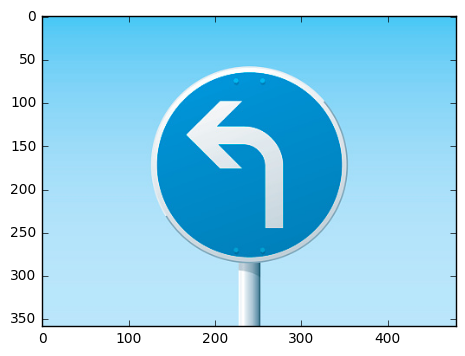

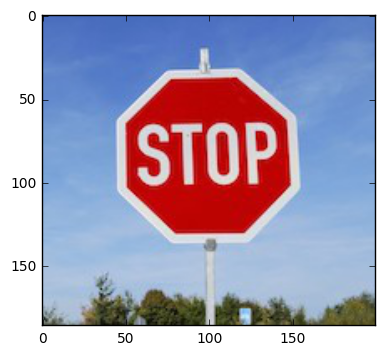

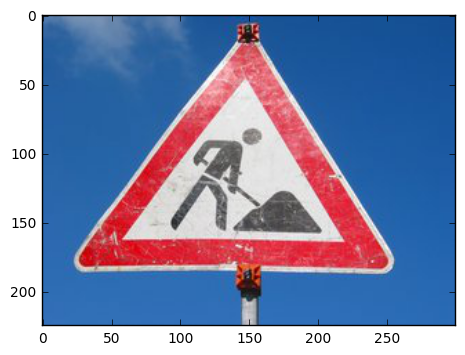

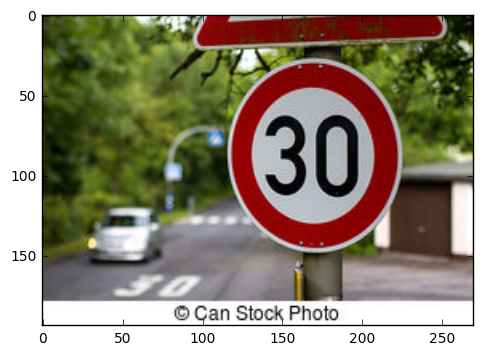

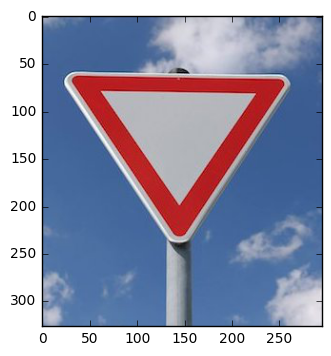

In [160]:
for i in range(0, 5):
    plt.figure();
    plt.imshow(web_images[i]);
    print(labels[i])

In [162]:
for i in range (0, 5):
    web_images[i] = cv2.resize(web_images[i],(32,32))
    web_images[i] = contrast_equalization(web_images[i])[:,:,0].reshape(32,32,1)
    print(web_images[i].shape)

(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)


In [164]:
print(np.mean(web_images), np.std(web_images))
web_images -= np.mean(web_images)
web_images /= np.std(web_images)
print(np.mean(web_images), np.std(web_images))

126.6416015625 75.27404015244896
-1.6653345369377347e-17 1.0


### Predict the Sign Type for Each Image

In [172]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, './traffic_sign_conv_net')
        web_images_accuracy = evaluate(web_images, labels)
        print("Web Images Accuracy = {:.3f}".format(web_images_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_sign_conv_net
Web Images Accuracy = 0.800


### Analyze Performance

In [171]:
### Calculate the accuracy for these 5 new images. 

for i in range(0, 5):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, "./traffic_sign_conv_net")
        web_images_accuracy = evaluate([web_images[i]], [labels[i]])
        print('Web Image {}'.format(i + 1))
        print("Accuracy = {:.3f}".format(web_images_accuracy))
        print()

INFO:tensorflow:Restoring parameters from ./traffic_sign_conv_net
Web Image 1
Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./traffic_sign_conv_net
Web Image 2
Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./traffic_sign_conv_net
Web Image 3
Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./traffic_sign_conv_net
Web Image 4
Accuracy = 0.000

INFO:tensorflow:Restoring parameters from ./traffic_sign_conv_net
Web Image 5
Accuracy = 1.000



The model is behaving pretty well, correctly predicting 4 images out of 5. This behavior is expected, since the images chosen are high quality images with a high contrast background. The image that is mistakenly predicted is the one containing also the web site source. I wanted to include this image to see if this could be a source of error and see how the model classify this image.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 



In [201]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

# Calculate top five softmax probabilities for the predictions
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./traffic_sign_conv_net")
    top_5_softmax = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: web_images, y: labels, keep_p_convolutional:1.00, keep_p_fully_connected:1.00})

INFO:tensorflow:Restoring parameters from ./traffic_sign_conv_net


In [202]:
for i in range(0, 5):
    print('Web Image {}'.format(i + 1))
    for j in range(0, 5):
        print("{}. ClassId".format(j+1), top_5_softmax[1][i][j])
        print('   ', top_5_softmax[0][i][j])
    print()

Web Image 1
1. ClassId 34
    0.8979087
2. ClassId 35
    0.030846028
3. ClassId 0
    0.02769805
4. ClassId 38
    0.018509153
5. ClassId 36
    0.015642602

Web Image 2
1. ClassId 14
    0.7593338
2. ClassId 12
    0.16966069
3. ClassId 15
    0.041337665
4. ClassId 17
    0.0129334405
5. ClassId 13
    0.004326425

Web Image 3
1. ClassId 25
    0.6263664
2. ClassId 31
    0.17781192
3. ClassId 21
    0.07062496
4. ClassId 29
    0.031042458
5. ClassId 20
    0.02078485

Web Image 4
1. ClassId 36
    0.10938308
2. ClassId 40
    0.1057055
3. ClassId 41
    0.09667231
4. ClassId 42
    0.0801657
5. ClassId 20
    0.07947091

Web Image 5
1. ClassId 13
    0.99797124
2. ClassId 12
    0.0007160093
3. ClassId 14
    0.00044417407
4. ClassId 17
    0.00019869221
5. ClassId 35
    0.0001921434



It is interesting to see that Web image 4 softmax proabilities are really close to each other and they really far from the correct prediction.